<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ODEAnalysis import *
import time

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


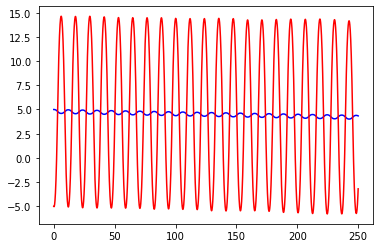

In [2]:
def body_2(t, q1, q2, p1, p2):
    #We have q1,q2,p1,p2 are numpy arrays(vectors) 
    m1 = 200
    m2 = 4
    G = 1
    
    dot_q1 = p1/m1 
    dot_q2 = p2/m2
    dot_p1 = -G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    dot_p2 = G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    
    if np.linalg.norm((dot_p1)) > 10:
        dot_p1 = 10*(dot_p1/np.linalg.norm(dot_p1))
        
        
    if np.linalg.norm(dot_p2) > 10:
        dot_p2 = 10*(dot_p2/np.linalg.norm(dot_p2))
 

    
    return np.array([dot_q1,dot_q2,dot_p1,dot_p2])
    
    
ODE = ODEAnalysis(body_2)    
a = ODE.RungeKutta(250,0,[5,-5,1,-1.5])

plt.plot(a[0], a[1][:,0], color = 'Blue')
plt.plot(a[0], a[1][:,1], color = 'Red')
plt.show()

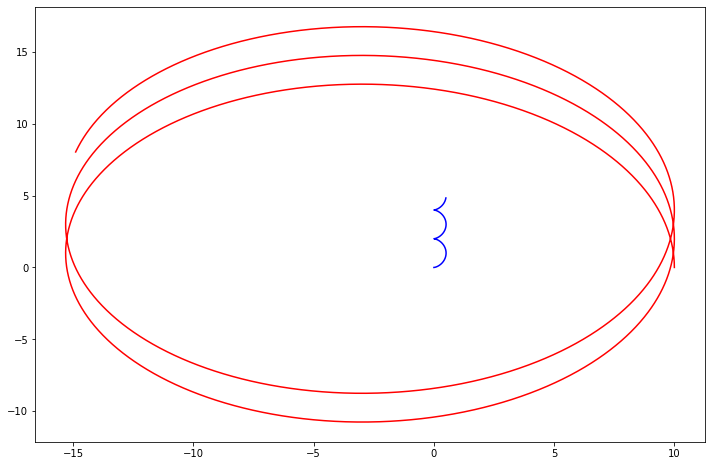

In [3]:
ODE = ODEAnalysis(body_2)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[0,0],[0,20]])

plt.figure(figsize=(12, 8))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.show()

<IPython.core.display.Javascript object>


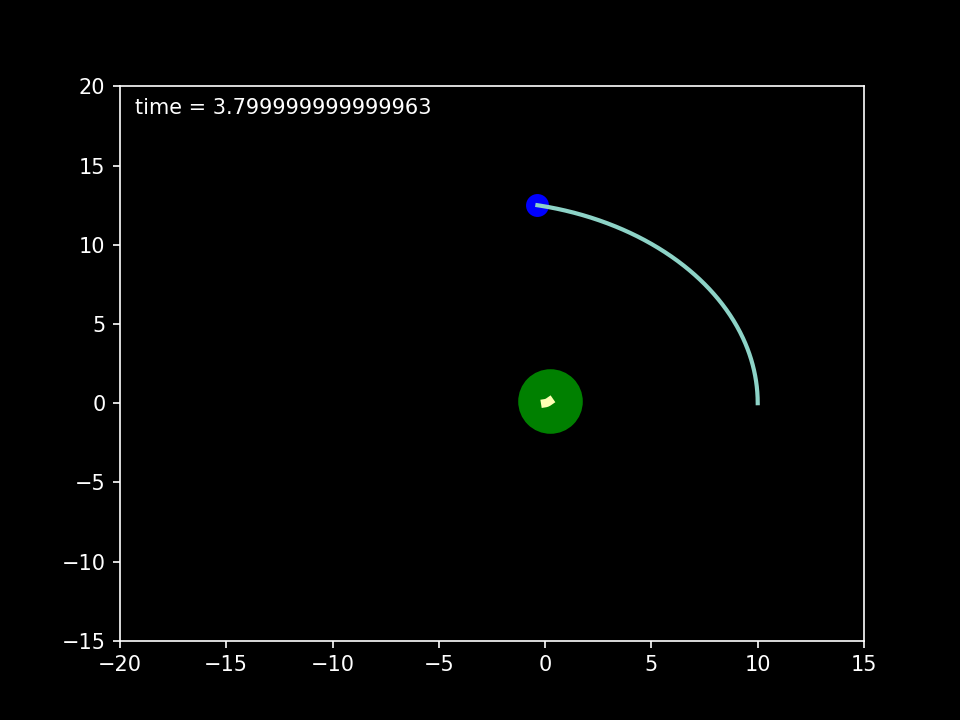

In [5]:
#Does not run on restart and run all so just run this again and it will work
%matplotlib notebook #Makes animations in notebook non-static

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')


Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed

fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)

Moon_Track, = ax.plot([],[], lw = 2)
Earth_Track, = ax.plot([],[], lw = 4)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    Earth_Track.set_data([],[])
    Moon_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, Earth_Track, Moon_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    
    Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, Earth_Track, Moon_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

#This line takes forever


In [12]:
#Frozen
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save('lines.mp4', writer=writer, dpi = 300)

<IPython.core.display.Javascript object>


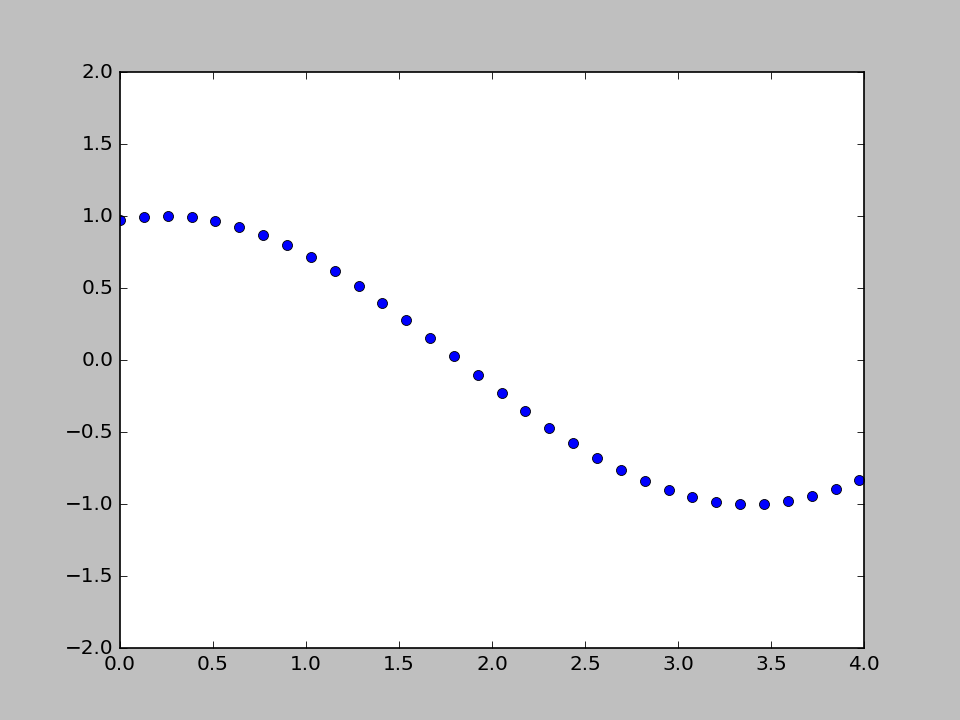

In [1]:
#Frozen
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
plt.style.use('classic')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], 'bo',ms = 6)

def init():
    line.set_data([],[])
    return line,

def animate(i):
    # i represents the frame number
    x = np.linspace(0,2*np.pi,50)
    y = np.sin(x-i*0.0628)
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

#This line takes forever
#anim.save('sine_wave.gif', writer='PillowWriter')